In [1]:
##### Import the necessary modules #####

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

In [37]:
## Load in the training and testing images using ImageDataGenerator
# Training images
train_datagen = ImageDataGenerator(width_shift_range = 0.1)
train_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train'

train_covid_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train/covid'
train_covid_names = os.listdir(train_covid_dir)

train_non_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/train/non'
train_non_names = os.listdir(train_non_dir)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (250, 250),
    batch_size = 20,
    class_mode = 'binary'
)

#Testing images
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (250, 250),
    batch_size = 20,
    class_mode = 'binary'
)
print(train_generator.class_indices)

Found 664 images belonging to 2 classes.
Found 3100 images belonging to 2 classes.
{'covid': 0, 'non': 1}


['figure1-5e71be566aa8714a04de3386-98-left.jpeg']
['Consolidation-patient38079-study2-view1_frontal.jpg']


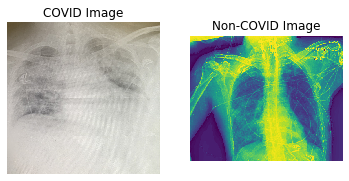

(1516, 1524, 3)


In [3]:
## Visualize some of the images

sp = plt.subplot(1, 2, 1, title = 'COVID Image')
sp.axis('off')

# Visualize a COVID case
random_covid_pic_name = random.sample(train_covid_names, k = 1)
print(random_covid_pic_name)
covid_pic_path = os.path.join(train_covid_dir, random_covid_pic_name[0])
covid_img = mpimg.imread(covid_pic_path)
plt.imshow(covid_img)


sp = plt.subplot(1, 2, 2, title = 'Non-COVID Image')
sp.axis('off')

# Visualize a non-covid case
random_non_pic_name = random.sample(train_non_names, k = 1)
print(random_non_pic_name)
non_pic_path = os.path.join(train_non_dir, random_non_pic_name[0])
non_img = mpimg.imread(non_pic_path)
plt.imshow(non_img)



plt.show()
print(covid_img.shape)

In [98]:
## Define a logistic regression model as a perceptron with sigmoid activation function
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (250, 250, 3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy', 'TruePositives', 'TrueNegatives'])

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 187500)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 187501    
Total params: 187,501
Trainable params: 187,501
Non-trainable params: 0
_________________________________________________________________


In [114]:
random.seed(123)
## Train the logistic regression model
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = 30,
                              epochs = 20,
                              validation_steps = 155,
                              verbose = 2)

Epoch 1/20
30/30 - 39s - loss: 25.6252 - binary_accuracy: 0.9366 - true_positives: 496.0000 - true_negatives: 51.0000 - val_loss: 0.1007 - val_binary_accuracy: 0.9671 - val_true_positives: 2950.0000 - val_true_negatives: 48.0000
Epoch 2/20
30/30 - 42s - loss: 54.9377 - binary_accuracy: 0.8921 - true_positives: 474.0000 - true_negatives: 47.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9755 - val_true_positives: 2960.0000 - val_true_negatives: 64.0000
Epoch 3/20
30/30 - 38s - loss: 38.8209 - binary_accuracy: 0.9229 - true_positives: 492.0000 - true_negatives: 47.0000 - val_loss: 0.1045 - val_binary_accuracy: 0.9742 - val_true_positives: 2953.0000 - val_true_negatives: 67.0000
Epoch 4/20
30/30 - 42s - loss: 68.2592 - binary_accuracy: 0.8767 - true_positives: 483.0000 - true_negatives: 43.0000 - val_loss: 0.0947 - val_binary_accuracy: 0.9700 - val_true_positives: 2965.0000 - val_true_negatives: 42.0000
Epoch 5/20
30/30 - 40s - loss: 72.6383 - binary_accuracy: 0.8836 - true_positives: 4

In [115]:
specificity = history.history['val_true_positives'][-1] / 3000
sensitivity = history.history['val_true_negatives'][-1]/100

print('SPECIFICITY: ' + str(specificity), '\n' + 'SENSITIVITY: ' + str(sensitivity))

SPECIFICITY: 0.9576666666666667 
SENSITIVITY: 0.93


In [130]:
# Predict an image classification
manual_test_img_name = random.sample(train_covid_names, k = 1)[0]

img = image.load_img(os.path.join(train_covid_dir, manual_test_img_name), target_size=(250, 250))
x = image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
print(x.shape) 
classes = model.predict(x, batch_size=10)
print(classes[0])

(1, 250, 250, 3)
[1.]


In [7]:
test_covid_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test/covid'
test_covid_names = os.listdir(train_covid_dir)

test_non_dir = 'C:/Users/Owner/Documents/STAT 6750/Project/data_upload_v2/test/non'
test_non_names = os.listdir(train_non_dir)




(1, 250, 250, 3)
[0.]


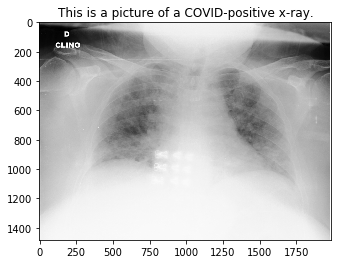

In [136]:
# Predict an image classification
manual_test_img_name = random.sample(train_covid_names, k = 1)[0]

manual_test_path = os.path.join(train_covid_dir, manual_test_img_name)
img = image.load_img(manual_test_path, target_size=(250, 250))
x = image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
print(x.shape) 
classes = model.predict(x, batch_size=10)

print(classes[0])
manual_test_img = mpimg.imread(manual_test_path)
if classes[0] > 0.5:
    plt.title('This is a picture of a COVID-negative x-ray.')
else:
    plt.title('This is a picture of a COVID-positive x-ray.')
plt.imshow(manual_test_img)
